# <h1>SALES ANALYSIS</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [2]:
df = pd.DataFrame()
path = 'Sales_Data/'

files = [file for file in os.listdir('Sales_Data')]
for file in files:
    concate_df = pd.read_csv(path + file)
    df = pd.concat([df, concate_df])

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
df.shape

(560550, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560550 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          558915 non-null  object
 1   Product           558915 non-null  object
 2   Quantity Ordered  558915 non-null  object
 3   Price Each        558915 non-null  object
 4   Order Date        558915 non-null  object
 5   Purchase Address  558915 non-null  object
dtypes: object(6)
memory usage: 29.9+ MB


In [6]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,558915,558915,558915,558915,558915,558915
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,1065,65709,505656,65709,1065,1065


In [7]:
df.isna().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [8]:
df.dropna(inplace=True)
df.shape

(558915, 6)

In [9]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'Product', 'LG Dryer'],
      dtype=object)

## What is the best month for sale?

In [10]:
def month(x):
    return x.split('/')[0]

In [11]:
df['month'] = df['Order Date'].apply(month)

In [12]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [13]:
df['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '07', '11', '10'], dtype=object)

In [14]:
df = df[df['month'] != 'Order Date']

In [15]:
df['month'].unique()

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '07', '11',
       '10'], dtype=object)

In [16]:
df['month'] = df['month'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [17]:
df['sales'] = df['Price Each'] * df['Quantity Ordered']

In [18]:
df.groupby('month')['sales'].sum()

month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: sales, dtype: float64

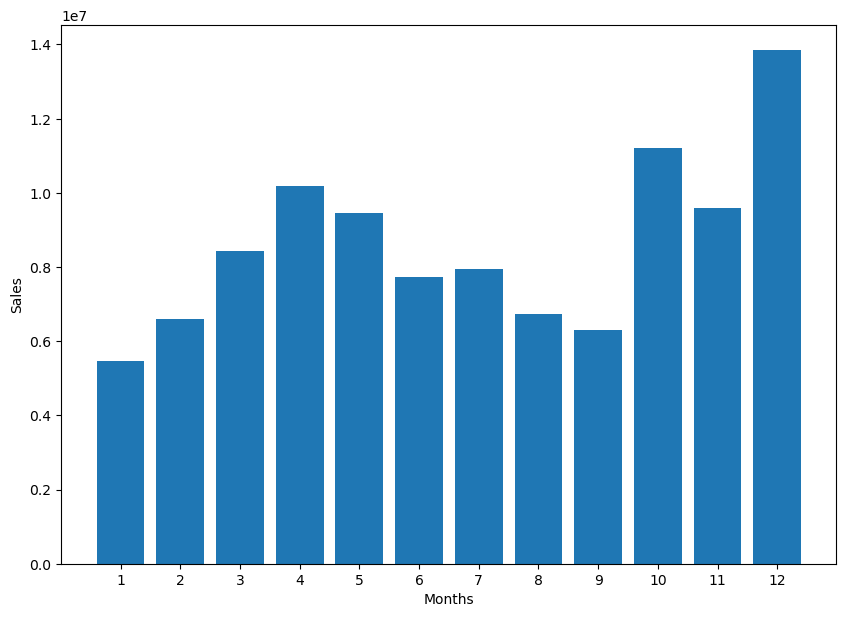

In [19]:
months = range(1,13)
plt.figure(figsize = (10,7))
plt.bar(months,df.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Which city has maximum orders?

In [20]:
df['Purchase Address']

0        136 Church St, New York City, NY 10001
1           562 2nd St, New York City, NY 10001
2          277 Main St, New York City, NY 10001
3           410 6th St, San Francisco, CA 94016
4                 43 Hill St, Atlanta, GA 30301
                          ...                  
13617             795 Pine St, Boston, MA 02215
13618     495 North St, New York City, NY 10001
13619     319 Ridge St, San Francisco, CA 94016
13620      916 Main St, San Francisco, CA 94016
13621            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 557850, dtype: object

In [21]:
def city(x):
    return x.split(',')[1].strip()

In [22]:
df['City'] = df['Purchase Address'].apply(city)

In [23]:
df.groupby('City')['City'].count()

City
Atlanta           44643
Austin            29715
Boston            59802
Dallas            44460
Los Angeles       88815
New York City     74628
Portland          37395
San Francisco    134196
Seattle           44196
Name: City, dtype: int64

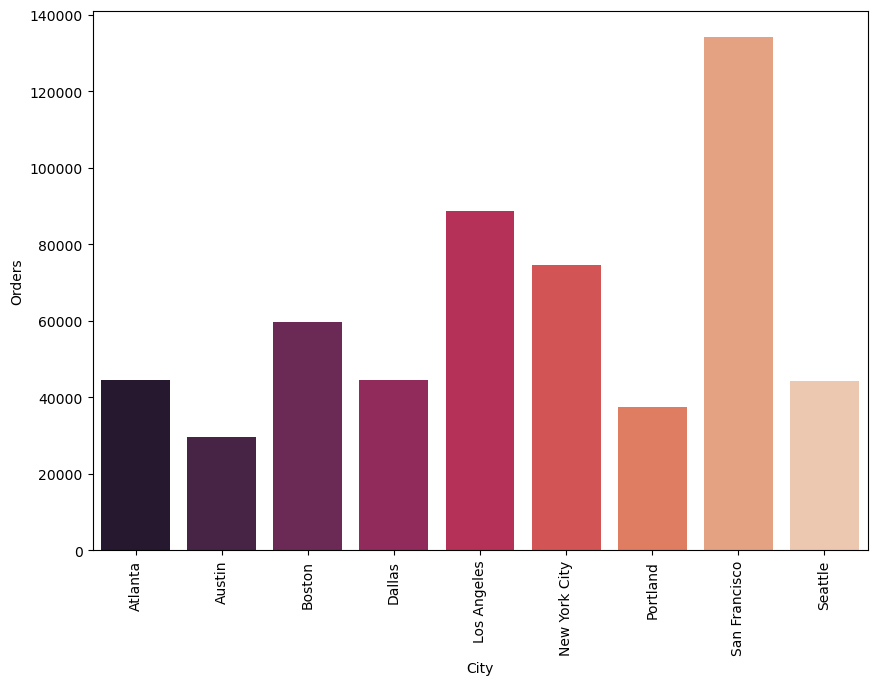

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.groupby('City')['City'].count().index,y=df.groupby('City')['City'].count(),palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Orders')
plt.show()

## What time should we display advertisements to maximise product purchase?

In [25]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

In [26]:
key = []
hour = []
for keys,hours in df.groupby('Hour'):
    key.append(keys)
    hour.append(len(hours))

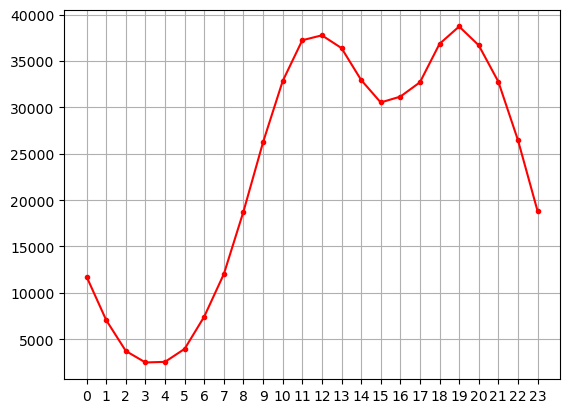

In [27]:
plt.plot(key, hour, 'r.-')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## What was the best-selling product? & Why?

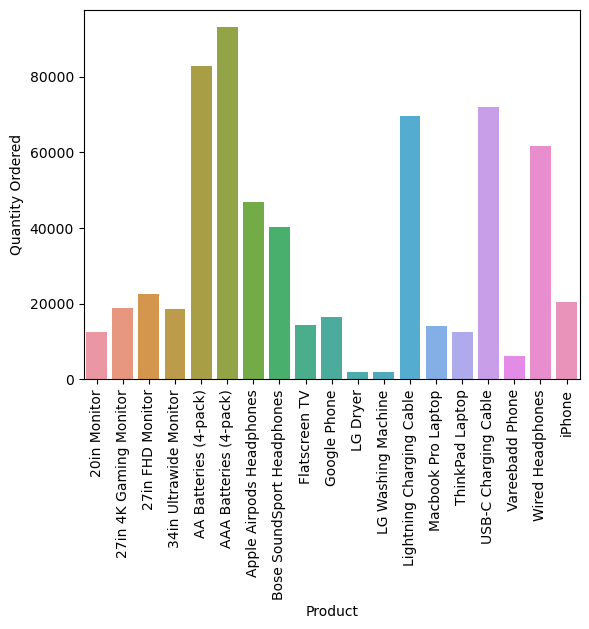

In [28]:
sns.barplot(x = df.groupby('Product')['Quantity Ordered'].sum().index, y = df.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(rotation=90);

In [29]:
quantity = df.groupby('Product')['Quantity Ordered'].sum()
product = df.groupby('Product')['Quantity Ordered'].sum().index
price_each = df.groupby('Product')['Price Each'].mean()

In [30]:
price_each

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [31]:
product

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [32]:
quantity

Product
20in Monitor                  12387
27in 4K Gaming Monitor        18732
27in FHD Monitor              22650
34in Ultrawide Monitor        18597
AA Batteries (4-pack)         82905
AAA Batteries (4-pack)        93051
Apple Airpods Headphones      46983
Bose SoundSport Headphones    40371
Flatscreen TV                 14457
Google Phone                  16596
LG Dryer                       1938
LG Washing Machine             1998
Lightning Charging Cable      69651
Macbook Pro Laptop            14184
ThinkPad Laptop               12390
USB-C Charging Cable          71925
Vareebadd Phone                6204
Wired Headphones              61671
iPhone                        20547
Name: Quantity Ordered, dtype: int64

/var/folders/5t/t6n_hs7x1xbfs6b8x3d5ncx80000gn/T/ipykernel_78632/3580501612.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation = 'vertical');


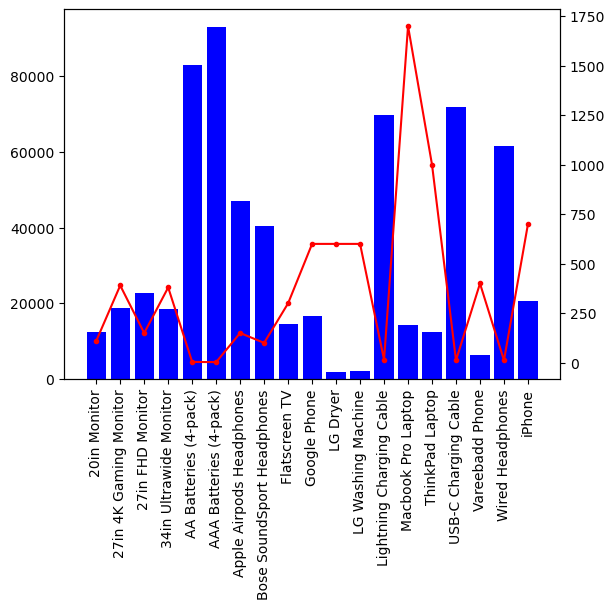

In [33]:
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,quantity,color = 'b')
ax2.plot(product,price_each,'r.-')
ax1.set_xticklabels(product,rotation = 'vertical');